# **Random Forest (Bosques Aleatorios)**

### Aprendizaje Supervisado / Clasificación

## Bagging
_Minería de datos_

---

Para poder comprender de qué trata el modelo de machine learning Random Forest es preciso antes hablar sobre los árboles de decisión. A contiuación se describe a grandes rasgos este concepto.


# **Arboles de decisión**

## **Introducción**

Los árboles de decisión son un popular método de aprendizaje supervisado siendo capaz de realizar tareas de regresión y clasificación, uniéndose así al grupo de algoritmos que hemos revisado en clases anteriores. Los árboles de decisión son fáciles de utilizar y entender, y representan un buen método de exploración si el interés es tener una mejor idea acerca de las características más influyentes en el set de datos.

## **¿Cómo funciona?**

Los árboles de decisión aprenden una serie reglas _if-else_ para los valores de las características/variables/atributos, este flujo de decisión (if-else) resulta en la predicción de una variable _target_.

![img](https://drive.google.com/uc?id=1sFF_qHMLX9c4vS9iyQdx4naqTRHR-RLS)

## **Ejemplo**

Juego del si/no

![img](https://drive.google.com/uc?id=1d1tZTed1jYySJsjxVU4ycLP1yYMSGQa1)

Este ejemplo consiste en un simple juego de preguntas cuyas respuestas deben ser si o no. Una persona x deberá adivinar un objeto (variable target) que la otra persona esté imaginando, realizando una serie de preguntas, cuyo objetivo es ir reduciendo las posibilidades hasta llegar a la respuesta correcta.

El flujo del ejemplo sería entonces:

1. ¿Está vivo?  
R. No

2. ¿Vuela?  
R. No

3. ¿Puede llevar a más de 10 personas?  
R. No

4. Es un automóvil!

Si lo notas, este flujo entonces tomará la forma de un **_árbol_** invertido y de ahí sus conceptos relacionados como:

_Arbol de decisión_
- Nodo raíz: nodo base del árbol
- Nodo hoja: representan las clases del dataset y son la parte más externa del árbol (no tienen nodos "hijos").

Con esto, es posible entonces diseñar una serie de reglas que resulten en un algoritmo capaz de aprender y pueda categorizar un objecto/variable.

---
---

Ahora que tenemos una idea más clara sobre los árboles de decisión, podemos proceder a hablar sobre random forest.


# **Random Forest**

## **Introducción**

Random Forest es uno de los métodos de Machine Learning más utilizados en el área y consiste en crear modelos de aprendizaje conocidos como _ensambles_ (unión). Un _ensamble_ (ensemble) consiste en agrupar múltiples modelos de aprendizaje y combinarlos, lo que produce un _modelo agregado_ que es mucho más "poderoso" (preciso) que los modelos individuales.

**¿Por qué los ensambles son efectivos?**

Aunque tengamos diferentes modelos de aprendizaje que individualmente se desempeñen "bien" (tengan una precisión aceptable), de igual forma tenderán a cometer diferentes tipos errores en un set de datos. Esto ocurre típicamente porque cada modelo podría [_sobreajustarse_](https://es.wikipedia.org/wiki/Sobreajuste) a diferentes porciones del set de datos. Al combinar diferentes modelos individuales en un ensamblaje podemos promediar sus errores para así reducir el riesgo de _sobreajuste_ y pueda _generalizar_ con mayor eficacia.

Esta idea de ensamblaje es aplicada entonces al modelo Random Forest y dentro de éste podemos destacar:

- Es un ensamblaje (agrupación) de muchos árboles de decisión.
- Extensamente usado, debido a sus buenos resultados en diversos tipo de problemas.
- módulo de scikit-learn -> [sklearn.ensemble](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble):
  - Clasificación: RandomForestClassifier
  - Regresión: RandomForestRegressor
- Un árbol de decisión -> riesgo de sobreajuste.
- Muchos árboles de decisión -> Más estable, generaliza mejor.
- El ensamblaje de árboles debiera ser diverso: introducir una **variación al azar** en la construcción de árboles.





## **Proceso**

![img](https://drive.google.com/uc?id=1ZdnIJoE9h2bEAQkEZcvi2dYu90ujBZ6Y)

<br>

**A nivel general los pasos que realiza el algoritmo son:**

1. Se divide el set de datos al azar para construir cada árbol de decisión (_Bootstrap Samples_ / _Instances_)
2. Se seleccionan las características al azar (_max_features_)
3. Se define la cantidad de árboles a construir (n_estimator)
4. Realiza una "votación" para cada resultado previsto.
5. Selecciona el resultado de la predicción con más votos como la predicción final.







## **A tener presente**

- El algoritmo es altamente sensitivo al parámetro _max_features_
- Cuando el parámetro _max_features_ equivale a 1, el algoritmo creará bosques más diversos y complejos.
- Si el parámetro _max_features_ se acerca al número de características, los bosques serán más similares y simples.

## **Desventajas**

- Los bosques aleatorios son lentos en la generación de predicciones porque tiene múltiples árboles de decisión. Cada vez que hace una predicción, todos los árboles en el bosque tienen que hacer una predicción y luego votar sobre él. Todo este proceso lleva mucho tiempo.
- El modelo es difícil de interpretar en comparación con un árbol de decisión, donde puede tomar una decisión fácilmente siguiendo la ruta en el árbol.

In [ ]:
#Import de librerías
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#Carga dataset
iris = datasets.load_iris()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### **Planta [Iris](https://es.wikipedia.org/wiki/Iris_(planta)**

#### _Especies_

![img](https://drive.google.com/uc?id=1Ot5RSlSQCE5cEpSLXLcyXUq0suyzeYzk)

In [ ]:
# imprime las etiquetas de las especies(setosa, versicolor,virginica)
print(iris.target_names)

# imprime las características del dataset
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
# imprime 5 1eros registros de los datos del dataset
print(iris.data[0:5])

# imprime las etiquetas del dataset (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# crea dataframe

data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X = data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Características
y = data['species']  # Etiquetas

# crea subconjuntos de datos (traning set y test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [ ]:
# crea modelo de tipo Random Forest (clasificador)
clf=RandomForestClassifier(n_estimators=100)

# Entrena el modelo con set de datos de entrenamiento
clf.fit(X_train,y_train)

# crea predicciones con datos de testing
y_pred=clf.predict(X_test)

In [ ]:
# mide precisión del modelo
print("Precisión: ", metrics.accuracy_score(y_test, y_pred))

Precisión:  0.9333333333333333


In [ ]:
df = pd.DataFrame({'Real': y_test, 'Predecido': clf.predict(X_test).flatten()})
df

,Real,Predecido
27,0,0
138,2,2
108,2,2
60,1,1
136,2,2
140,2,2
132,2,2
33,0,0
129,2,2
95,1,1


In [ ]:
# mide la "importancia/influencia" de cada una de las características 
feature_imp = pd.Series(clf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.448239
petal length (cm)    0.426404
sepal length (cm)    0.096513
sepal width (cm)     0.028844
dtype: float64

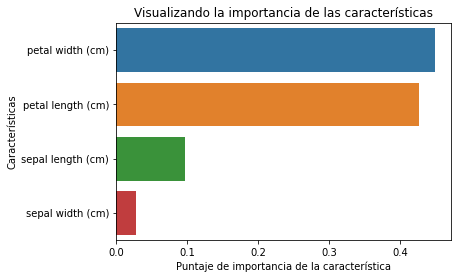

In [ ]:
%matplotlib inline
# Crea gráfico de barras
sns.barplot(x=feature_imp, y=feature_imp.index)
# Añade etiquetas
plt.xlabel('Puntaje de importancia de la característica')
plt.ylabel('Características')
plt.title("Visualizando la importancia de las características")
plt.show()